In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("M:/DataSets/house_price_prediction.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<AxesSubplot:>

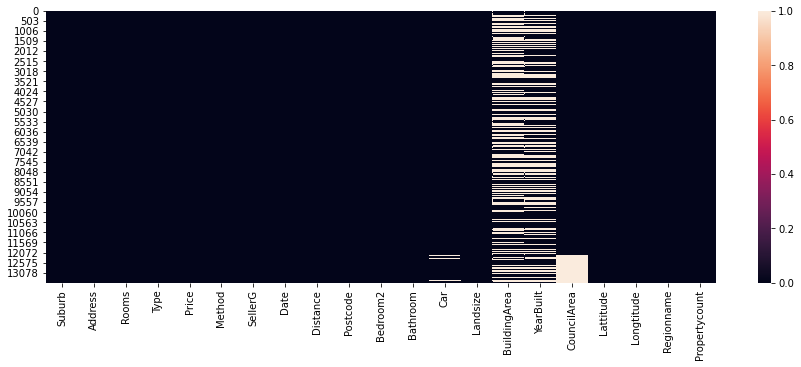

In [3]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.isnull())

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
data = data.select_dtypes(exclude='object')
data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


## 1.Drop Null Values

In [6]:
data1=data.dropna()

## 2. Use SimpleImputer 

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
data2=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

## 3. Use IterativeImputer

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer(initial_strategy='mean')
data3=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

## 4. Use KNNImputer

In [9]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(weights='distance')
data4=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

## 5. Optimizied Simple Imputer

In [10]:
cols = [col for col in data.columns if data[col].isnull().any()]
for col in cols:
    data[col + "_was_missing"] = data[col].isnull()
imputer=SimpleImputer(strategy='median')
data5=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score(data):
    x_train,x_test,y_train,y_test=train_test_split(data.drop('Price',axis=1),data['Price'],test_size=30,random_state=78)
    model=RandomForestRegressor()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    return mean_absolute_error(y_pred,y_test)

In [12]:
scores=[]
scores.append(score(data1))
scores.append(score(data2))
scores.append(score(data3))
scores.append(score(data4))
scores.append(score(data5))

In [13]:
result=pd.DataFrame(scores,columns=["MAE"])

In [14]:
result['method']=["drop values","Simple Imputer","Iterative Imputer","KNN Imputer","Optimized Simple Imputer"]

In [15]:
result=result[["method","MAE"]]
result

,method,MAE
0,drop values,166141.609111
1,Simple Imputer,101245.713667
2,Iterative Imputer,124932.752333
3,KNN Imputer,145410.640778
4,Optimized Simple Imputer,104205.627667
